# Boltzmann Lattice (Fluid flow)

## Simulation setup & execution

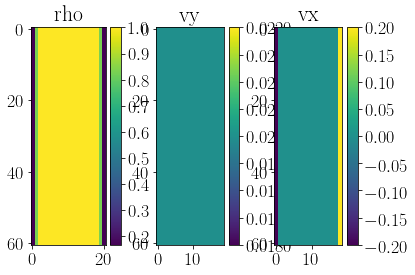

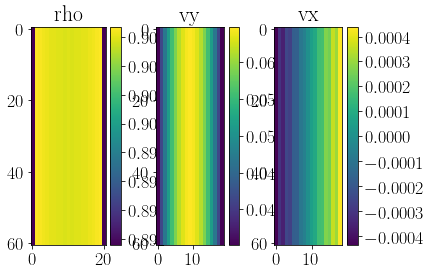

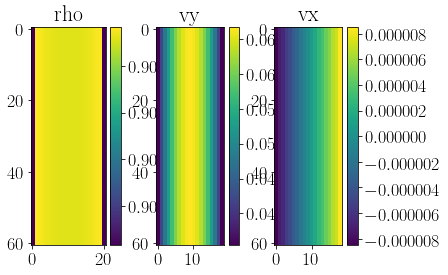

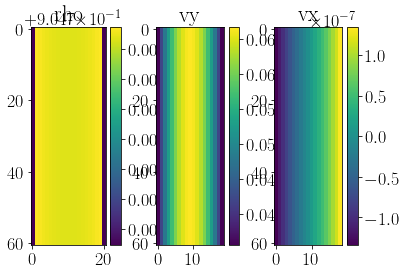

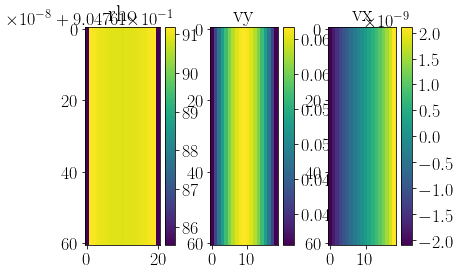

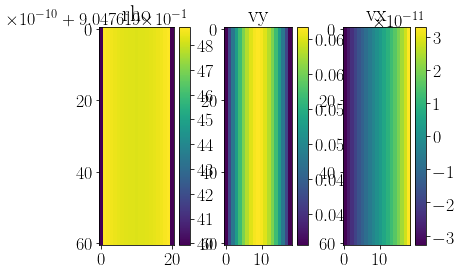

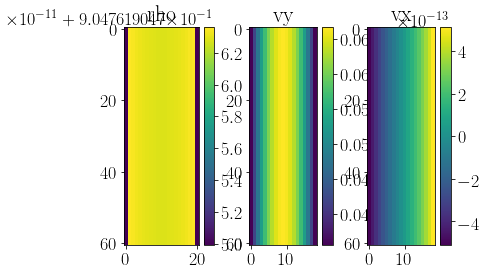

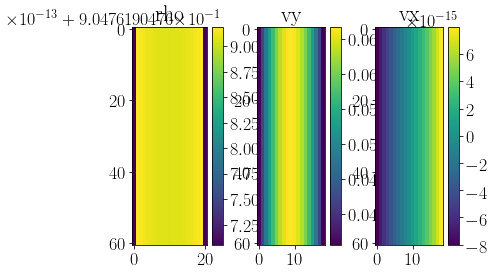

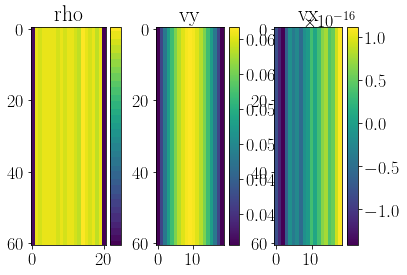

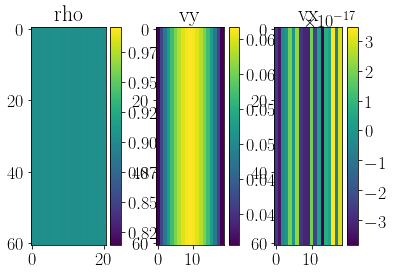

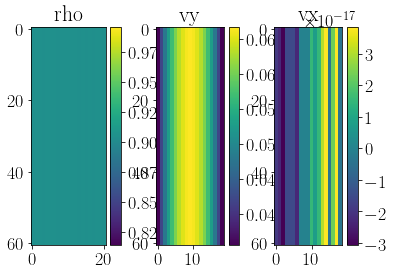

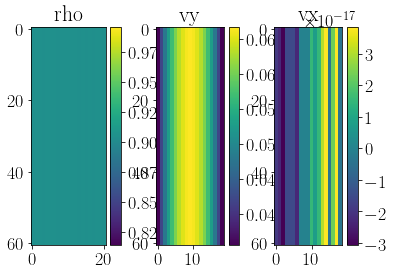

Maximum number of iterations (1000) have been reached. It is adviced to increase the maximum number of iterations or increase the error tolerance (epsilon).
Total run time = 10.254339218139648


In [1]:
import time as tm
from types import SimpleNamespace
from Boltzmann_simulation import *
from constants import *

start_time = tm.time()

# Create name space
sim = SimpleNamespace()

# Assign system dimensions/parameters
sim.L, sim.W = 60, 20
sim.m = 1
sim.P = 1
sim.epsilon = 0#0.001
sim.max_iterations = 1000
sim.plot_iteration = 100
sim.nu = 2
sim.dv = 0.01

# Square obstruction
sim.obs = 'none' # obstruction type (none, square or cylinder) 
sim.R = int(sim.W/4)

#Load constants
sim = constants(sim)

# Set data processing parameters
sim.fig_dir = './figures/'
sim.save = True

# Actual simulation
par = boltzmann_sim(sim)

#Reynolds_pipe, Reynolds_obs = Reynolds(sim, par)
    
end_time = tm.time()
total_time = end_time - start_time
print('Total run time =', total_time)

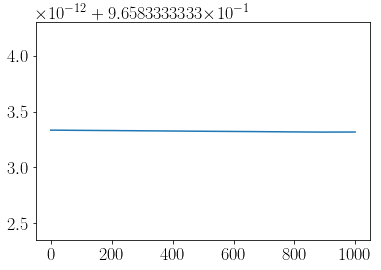

In [3]:
plt.plot(par.rho_tot)
plt.show()

# To Do

- Implement intial densities  (now just set to 0), make sure that upper and lower boundary are set to 0.
- Implement pressure gradient (hence for in x direction) (In forcing function)
- Namespace for results (needed for data processing)
- Add movie (-> under construction)